In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV


from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
#import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

from sklearn.utils import shuffle


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [3]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [4]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [5]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [6]:
df['person_home_ownership'].mode()

0    RENT
Name: person_home_ownership, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [8]:
df['person_gender']=df['person_gender'].map({"female":0 ,"male":1})
df['person_education']=df['person_education'].map({"High School":0 ,"Bachelor":1 , 'Master':2 , 'Associate':3 , 'Doctorate':4})
df['person_home_ownership']=df['person_home_ownership'].map({"MORTGAGE":0 ,"RENT":1 , 'OWN':2 , 'OTHER':3})
df['loan_intent']=df['loan_intent'].map({"PERSONAL":0 ,"EDUCATION":1 , 'MEDICAL':2 , 'VENTURE':3 , 'HOMEIMPROVEMENT':4 , 'DEBTCONSOLIDATION':5})
df['previous_loan_defaults_on_file']=df['previous_loan_defaults_on_file'].map({"No":0 ,"Yes":1})

df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,2,71948.0,0,1,35000.0,0,16.02,0.49,3.0,561,0,1
1,21.0,0,0,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,0,12438.0,3,0,5500.0,2,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,1,35000.0,2,15.23,0.44,2.0,675,0,1
4,24.0,1,2,66135.0,1,1,35000.0,2,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,3,47971.0,6,1,15000.0,2,15.66,0.31,3.0,645,0,1
44996,37.0,0,3,65800.0,17,1,9000.0,4,14.07,0.14,11.0,621,0,1
44997,33.0,1,3,56942.0,7,1,2771.0,5,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,1,12000.0,1,13.23,0.36,6.0,604,0,1


In [9]:
# Handle missing values
# Fill numeric missing values with median and categorical with mode
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

# Encode categorical features using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Handle duplicates
df = df.drop_duplicates()

# Detect and handle outliers using Z-score
from scipy.stats import zscore
z_scores = df.select_dtypes(include=['float64', 'int64']).apply(zscore)
df = df[(z_scores < 3).all(axis=1)]


In [10]:
print('Duplicated value:')
df.duplicated().sum()

Duplicated value:


0

In [11]:
print('Missing value:')
df.isna().sum()

Missing value:


person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42886 entries, 1 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      42886 non-null  float64
 1   person_gender                   42886 non-null  int64  
 2   person_education                42886 non-null  int64  
 3   person_income                   42886 non-null  float64
 4   person_emp_exp                  42886 non-null  int64  
 5   person_home_ownership           42886 non-null  int64  
 6   loan_amnt                       42886 non-null  float64
 7   loan_intent                     42886 non-null  int64  
 8   loan_int_rate                   42886 non-null  float64
 9   loan_percent_income             42886 non-null  float64
 10  cb_person_cred_hist_length      42886 non-null  float64
 11  credit_score                    42886 non-null  int64  
 12  previous_loan_defaults_on_file  42886

In [13]:
df.describe()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,42886.000000,42886.000000,42886.000000,42886.000000,42886.000000,42886.000000,42886.000000,42886.000000,42886.000000,42886.000000,42886.000000,42886.000000,42886.000000,42886.000000
mean,27.266404,0.550553,1.463018,76484.270974,4.914448,0.656205,9209.611878,2.324721,10.963967,0.136244,5.610735,631.893905,0.514527,0.215105
std,4.917188,0.497444,1.178297,42717.057206,4.927416,0.597127,5790.403201,1.670056,2.946085,0.081087,3.438697,50.159099,0.499795,0.410900
min,20.000000,0.000000,0.000000,8000.000000,0.000000,0.000000,500.000000,0.000000,5.420000,0.000000,2.000000,390.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,47053.250000,1.000000,0.000000,5000.000000,1.000000,8.560000,0.070000,3.000000,601.000000,0.000000,0.000000
50%,26.000000,1.000000,1.000000,66898.500000,4.000000,1.000000,8000.000000,2.000000,11.010000,0.120000,4.000000,639.000000,1.000000,0.000000
75%,30.000000,1.000000,3.000000,94444.750000,7.000000,1.000000,12000.000000,4.000000,12.990000,0.180000,8.000000,669.000000,1.000000,0.000000
max,45.000000,1.000000,4.000000,321399.000000,23.000000,2.000000,28523.000000,5.000000,19.910000,0.400000,17.000000,768.000000,1.000000,1.000000


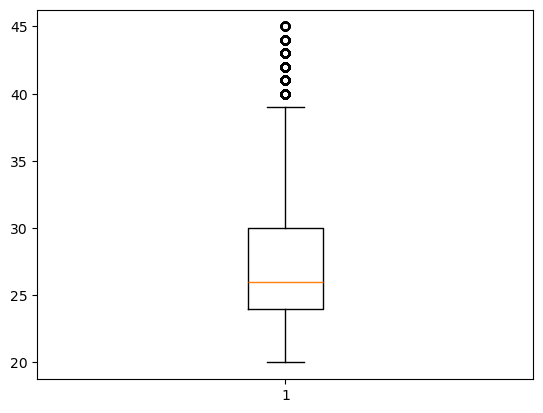

In [14]:
fig = plt.boxplot( df['person_age'])

In [15]:
Q1 = df['person_age'].quantile(0.25)
Q3 = df['person_age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df['person_age'] = np.where(df['person_age'] < lower, lower, df["person_age"])
df['person_age'] = np.where(df['person_age'] > upper, upper, df["person_age"])
#clip
#colum.clip(df, lower, upper)

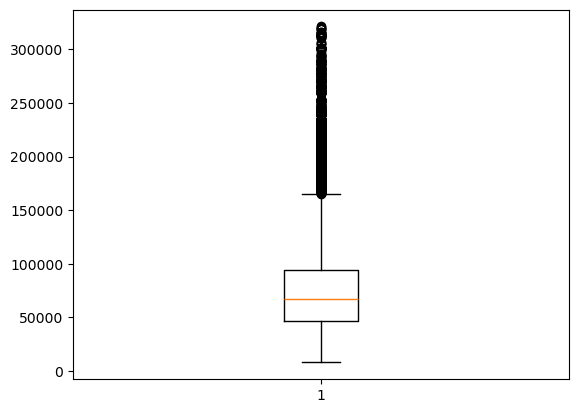

In [16]:
fig = plt.boxplot( df['person_income'])

In [17]:
Q1 = df['person_income'].quantile(0.25)
Q3 = df['person_income'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df['person_income'] = np.where(df['person_income'] < lower, lower, df["person_income"])
df['person_income'] = np.where(df['person_income'] > upper, upper, df["person_income"])

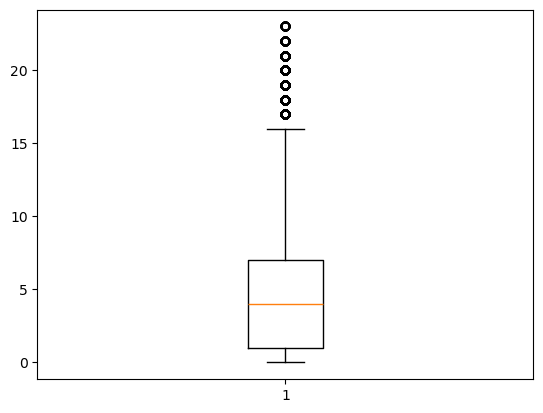

In [18]:
fig = plt.boxplot( df['person_emp_exp'])

In [19]:
Q1 = df['person_emp_exp'].quantile(0.25)
Q3 = df['person_emp_exp'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df['person_emp_exp'] = np.where(df['person_emp_exp'] < lower, lower, df["person_emp_exp"])
df['person_emp_exp'] = np.where(df['person_emp_exp'] > upper, upper, df["person_emp_exp"])

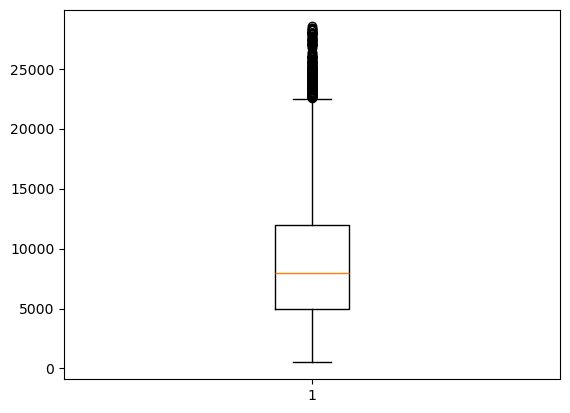

In [20]:
fig = plt.boxplot( df['loan_amnt'])

In [21]:
Q1 = df['loan_amnt'].quantile(0.25)
Q3 = df['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df['loan_amnt'] = np.where(df['loan_amnt'] < lower, lower, df["loan_amnt"])
df['loan_amnt'] = np.where(df['loan_amnt'] > upper, upper, df["loan_amnt"])

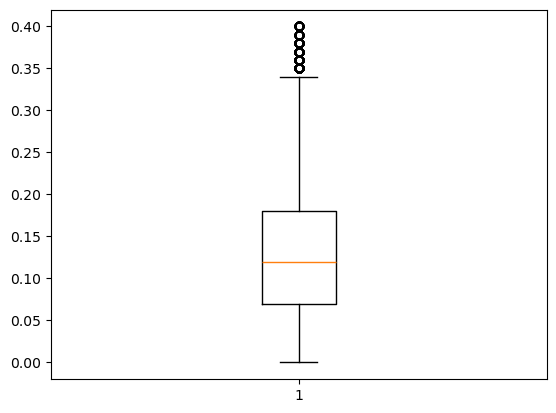

In [22]:
fig = plt.boxplot( df['loan_percent_income'])

In [23]:
Q1 = df['loan_percent_income'].quantile(0.25)
Q3 = df['loan_percent_income'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df['loan_percent_income'] = np.where(df['loan_percent_income'] < lower, lower, df["loan_percent_income"])
df['loan_percent_income'] = np.where(df['loan_percent_income'] > upper, upper, df["loan_percent_income"])

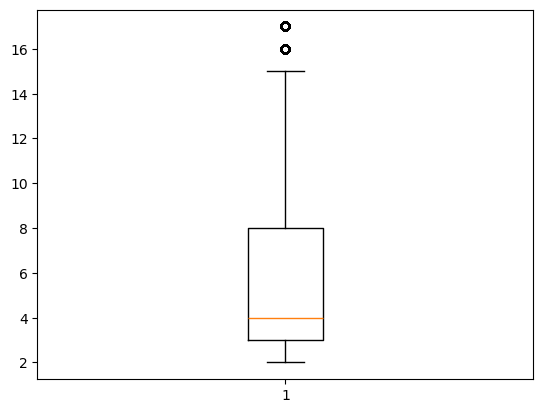

In [24]:
fig = plt.boxplot( df['cb_person_cred_hist_length'])

In [25]:
Q1 = df['cb_person_cred_hist_length'].quantile(0.25)
Q3 = df['cb_person_cred_hist_length'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df['cb_person_cred_hist_length'] = np.where(df['cb_person_cred_hist_length'] < lower, lower, df["cb_person_cred_hist_length"])
df['cb_person_cred_hist_length'] = np.where(df['cb_person_cred_hist_length'] > upper, upper, df["cb_person_cred_hist_length"])

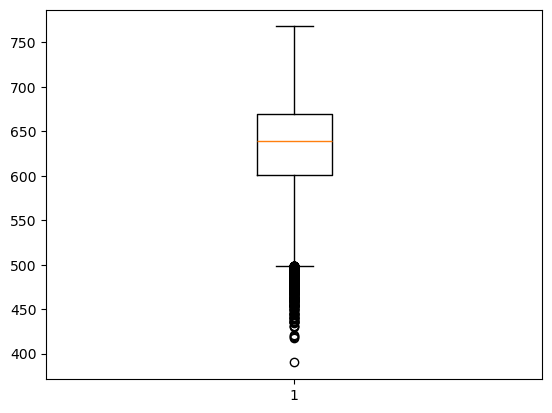

In [26]:
fig = plt.boxplot( df['credit_score'])

In [27]:
Q1 = df['credit_score'].quantile(0.25)
Q3 = df['credit_score'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df['credit_score'] = np.where(df['credit_score'] < lower, lower, df["credit_score"])
df['credit_score'] = np.where(df['credit_score'] > upper, upper, df["credit_score"])

In [28]:
df.describe()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,42886.000000,42886.000000,42886.000000,42886.000000,42886.000000,42886.000000,42886.000000,42886.000000,42886.000000,42886.000000,42886.000000,42886.000000,42886.000000,42886.000000
mean,27.184886,0.550553,1.463018,74641.177307,4.804552,0.656205,9116.593690,2.324721,10.963967,0.135812,5.592198,632.115865,0.514527,0.215105
std,4.686305,0.497444,1.178297,36798.050979,4.624009,0.597127,5549.518069,1.670056,2.946085,0.079869,3.381574,49.488426,0.499795,0.410900
min,20.000000,0.000000,0.000000,8000.000000,0.000000,0.000000,500.000000,0.000000,5.420000,0.000000,2.000000,499.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,47053.250000,1.000000,0.000000,5000.000000,1.000000,8.560000,0.070000,3.000000,601.000000,0.000000,0.000000
50%,26.000000,1.000000,1.000000,66898.500000,4.000000,1.000000,8000.000000,2.000000,11.010000,0.120000,4.000000,639.000000,1.000000,0.000000
75%,30.000000,1.000000,3.000000,94444.750000,7.000000,1.000000,12000.000000,4.000000,12.990000,0.180000,8.000000,669.000000,1.000000,0.000000
max,39.000000,1.000000,4.000000,165532.000000,16.000000,2.000000,22500.000000,5.000000,19.910000,0.345000,15.500000,768.000000,1.000000,1.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42886 entries, 1 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      42886 non-null  float64
 1   person_gender                   42886 non-null  int64  
 2   person_education                42886 non-null  int64  
 3   person_income                   42886 non-null  float64
 4   person_emp_exp                  42886 non-null  float64
 5   person_home_ownership           42886 non-null  int64  
 6   loan_amnt                       42886 non-null  float64
 7   loan_intent                     42886 non-null  int64  
 8   loan_int_rate                   42886 non-null  float64
 9   loan_percent_income             42886 non-null  float64
 10  cb_person_cred_hist_length      42886 non-null  float64
 11  credit_score                    42886 non-null  float64
 12  previous_loan_defaults_on_file  42886

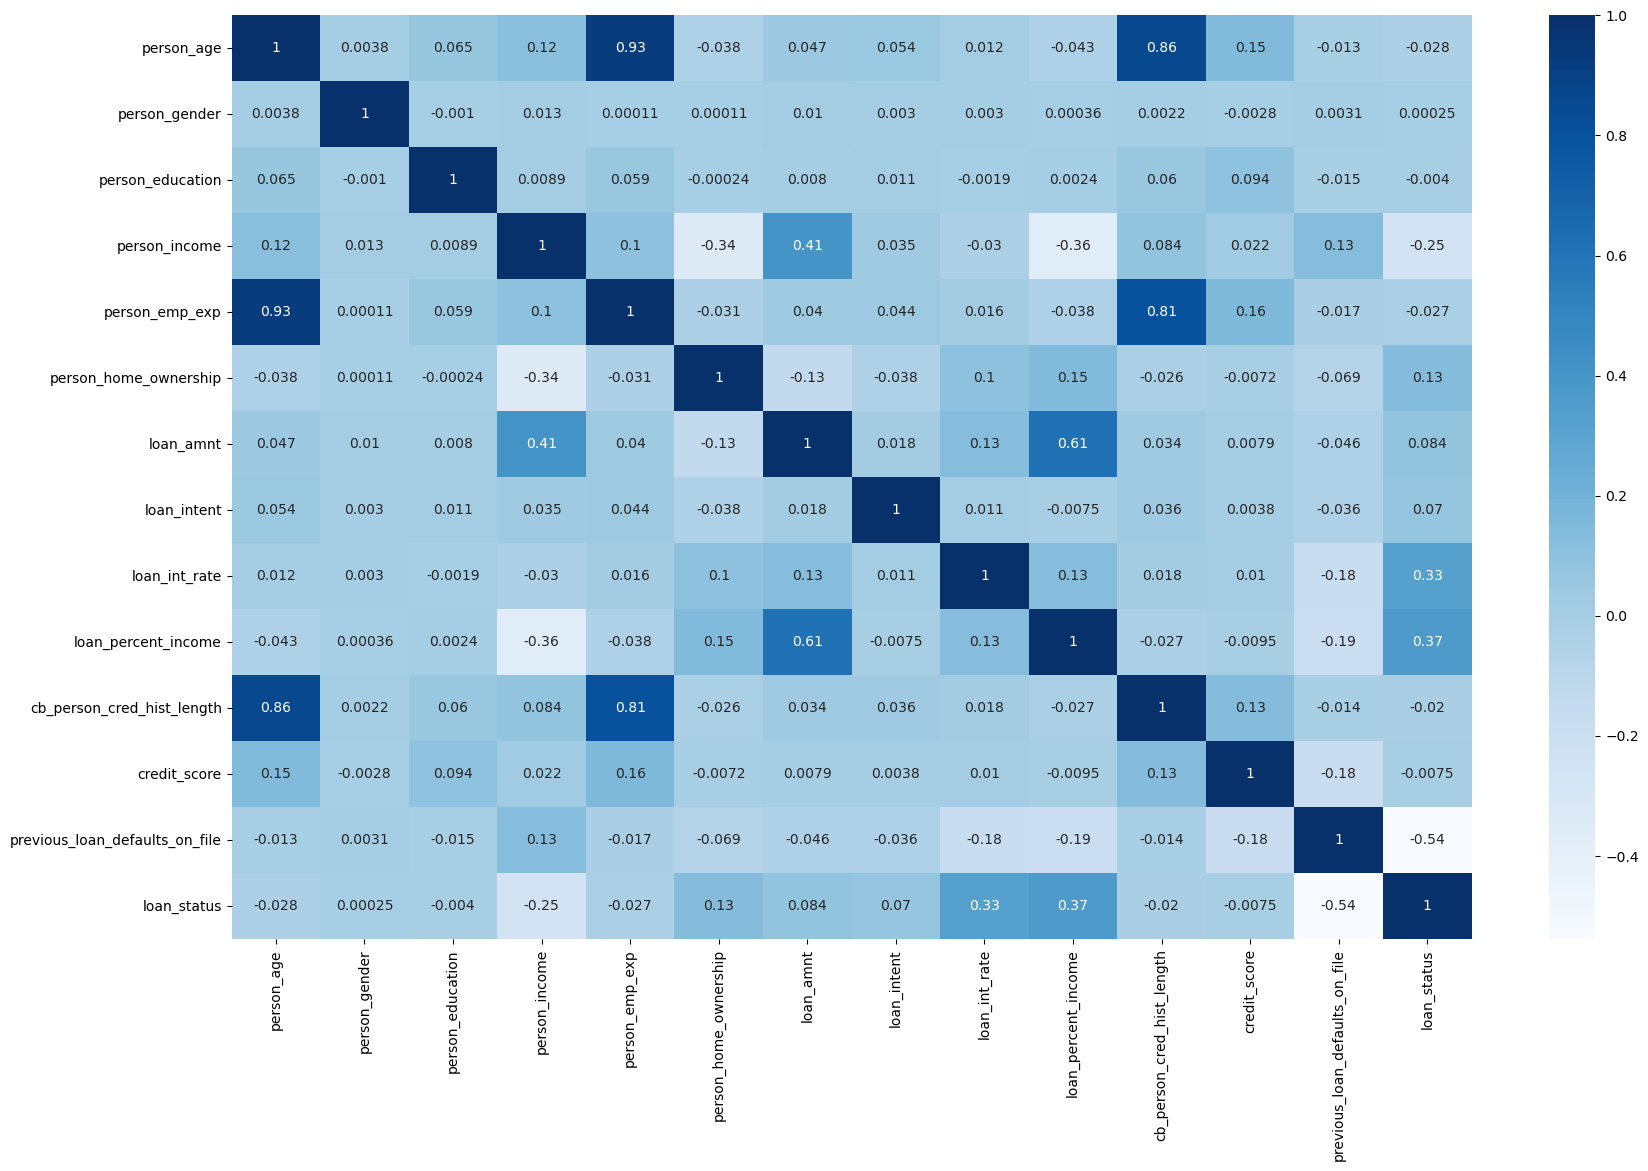

In [30]:
correlation_matrix =df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix , annot= True , cmap='Blues')
plt.show()

In [31]:
threshold = 0.01
correlation_matrix = df.corr()
high_corr_feature = correlation_matrix.index[abs(correlation_matrix['loan_status'])>threshold].tolist()
high_corr_feature.remove('loan_status')

print('selected features based on correlation with target:')
print(high_corr_feature)


X_selected = df[high_corr_feature]
y = df['loan_status']

selected features based on correlation with target:
['person_age', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'previous_loan_defaults_on_file']


In [32]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X_selected)

In [33]:
x_train , x_test , y_train , y_test = train_test_split(X,y ,train_size=0.8,shuffle=True,random_state=40)

In [34]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [35]:
x_train.shape

(34308, 10)

In [36]:
# Create and train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

# Create and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

# Make predictions
lr_pred = lr_model.predict(x_test)
knn_pred = knn_model.predict(x_test)

# Calculate accuracies
lr_accuracy = accuracy_score(y_test, lr_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

# Print results
print("Model Comparison Results:")
print("-" * 50)
print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, lr_pred))
print("-" * 50)
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")
print("\nKNN Classification Report:")
print(classification_report(y_test, knn_pred))
print("Confusion Matrix (KNN):\n", confusion_matrix(y_test, knn_pred))

# Create comparison DataFrame
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN'],
    'Accuracy': [lr_accuracy * 100, knn_accuracy * 100]
})
print("\nSummary Comparison:")
print(results_df.to_string(index=False))

# Determine best model
best_model = "Logistic Regression" if lr_accuracy > knn_accuracy else "KNN"
print(f"\nBest performing model: {best_model}")


Model Comparison Results:
--------------------------------------------------
Logistic Regression Accuracy: 88.30%

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      6725
           1       0.74      0.70      0.72      1853

    accuracy                           0.88      8578
   macro avg       0.83      0.82      0.82      8578
weighted avg       0.88      0.88      0.88      8578

Confusion Matrix (Logistic Regression):
 [[6280  445]
 [ 559 1294]]
--------------------------------------------------
KNN Accuracy: 89.97%

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6725
           1       0.78      0.74      0.76      1853

    accuracy                           0.90      8578
   macro avg       0.86      0.84      0.85      8578
weighted avg       0.90      0.90      0.90      8578

Confusion Matrix (KN

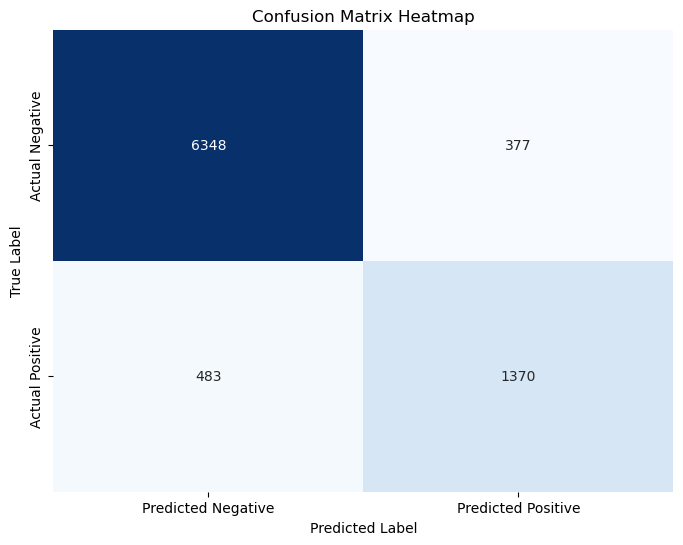

In [37]:
conf_matrix3 =confusion_matrix(y_test, knn_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV 

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # 'l1' replaced with 'l2' as 'l1' is incompatible with 'lbfgs'
    'solver': ['liblinear', 'lbfgs']
}

# Perform GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(x_train, y_train)
best_lr_params = grid_search_lr.best_params_

# Train the best Logistic Regression model
best_lr = LogisticRegression(**best_lr_params, random_state=42)
best_lr.fit(x_train, y_train)

# Make predictions and evaluate Logistic Regression
lr_pred = best_lr.predict(x_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan and Euclidean distance metrics
}

# Perform GridSearchCV for KNN
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(x_train, y_train)
best_knn_params = grid_search_knn.best_params_

# Train the best KNN model
best_knn = KNeighborsClassifier(**best_knn_params)
best_knn.fit(x_train, y_train)

# Make predictions and evaluate KNN
knn_pred = best_knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

# Print results for both models
print("Model Comparison Results:")
print("-" * 50)
print("Logistic Regression Results:")
print(f"Best Parameters: {best_lr_params}")
print(f"Accuracy: {lr_accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("-" * 50)
print("KNN Results:")
print(f"Best Parameters: {best_knn_params}")
print(f"Accuracy: {knn_accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, knn_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))

# Compare results and summarize
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN'],
    'Accuracy': [lr_accuracy * 100, knn_accuracy * 100]
})
print("\nSummary Comparison:")
print(results_df.to_string(index=False))

best_model = "Logistic Regression" if lr_accuracy > knn_accuracy else "KNN"
print(f"\nBest performing model: {best_model}")


Model Comparison Results:
--------------------------------------------------
Logistic Regression Results:
Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 88.33%
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      6725
           1       0.74      0.70      0.72      1853

    accuracy                           0.88      8578
   macro avg       0.83      0.82      0.82      8578
weighted avg       0.88      0.88      0.88      8578

Confusion Matrix:
 [[6279  446]
 [ 555 1298]]
--------------------------------------------------
KNN Results:
Best Parameters: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Accuracy: 91.05%
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      6725
           1       0.83      0.74      0.78      1853

    accuracy                           0.91      8578
   macro avg       0.88   

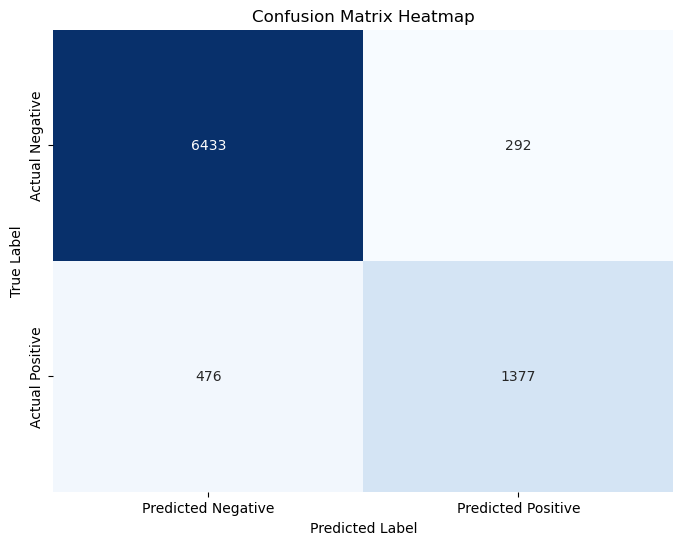

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix4 =confusion_matrix(y_test, knn_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix4, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()